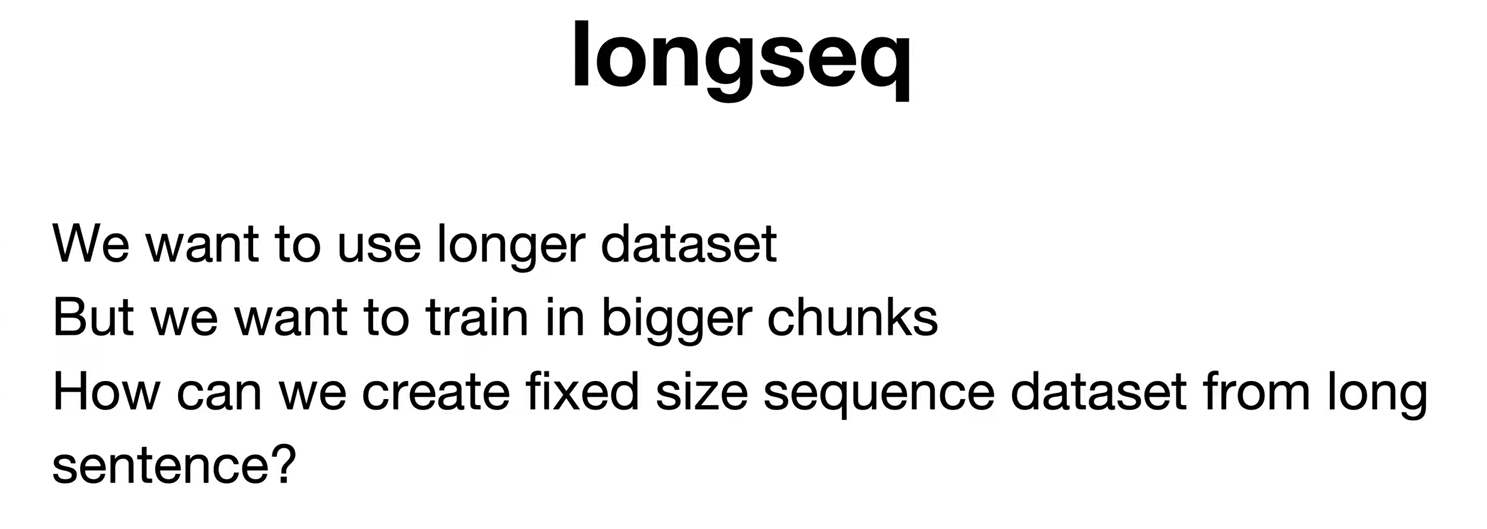

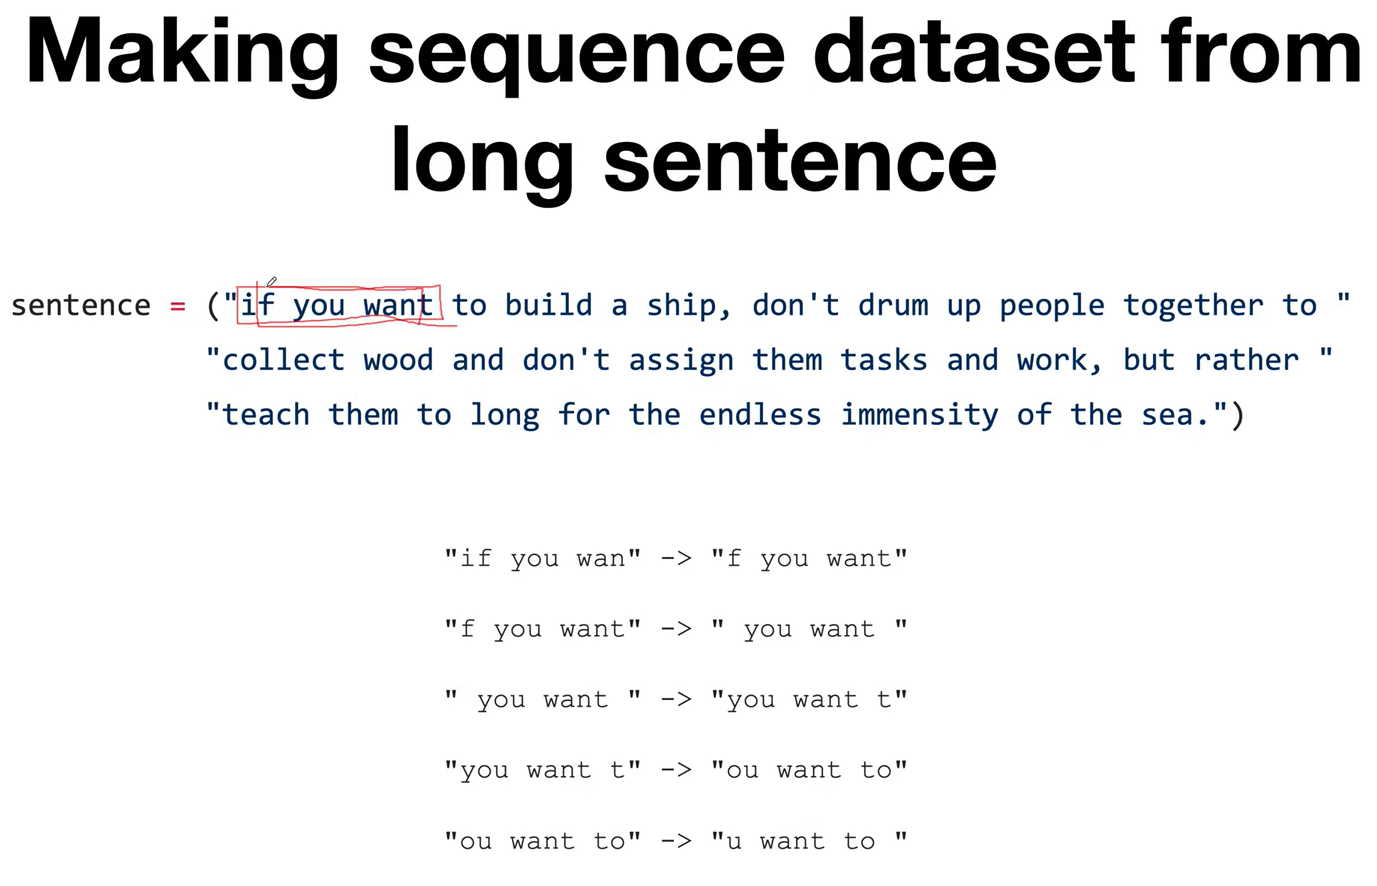

In [19]:
import torch
import torch.optim as optim
import numpy as np

In [20]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

In [21]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [22]:
# make dictionary
char_set = list(set(sentence))
char_dic = {c: i for i, c in enumerate(char_set)}

In [23]:
# hyper parameters
dic_size = len(char_dic)
hidden_size = len(char_dic)
sequence_length = 10  # Any arbitrary number
learning_rate = 0.1

In [24]:
#data setting
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x_data.append([char_dic[c] for c in x_str])     #x str to index
    y_data.append([char_dic[c] for c in y_str])     #y str to index

x_one_hot = [np.eye(dic_size)[x] for x in x_data]

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

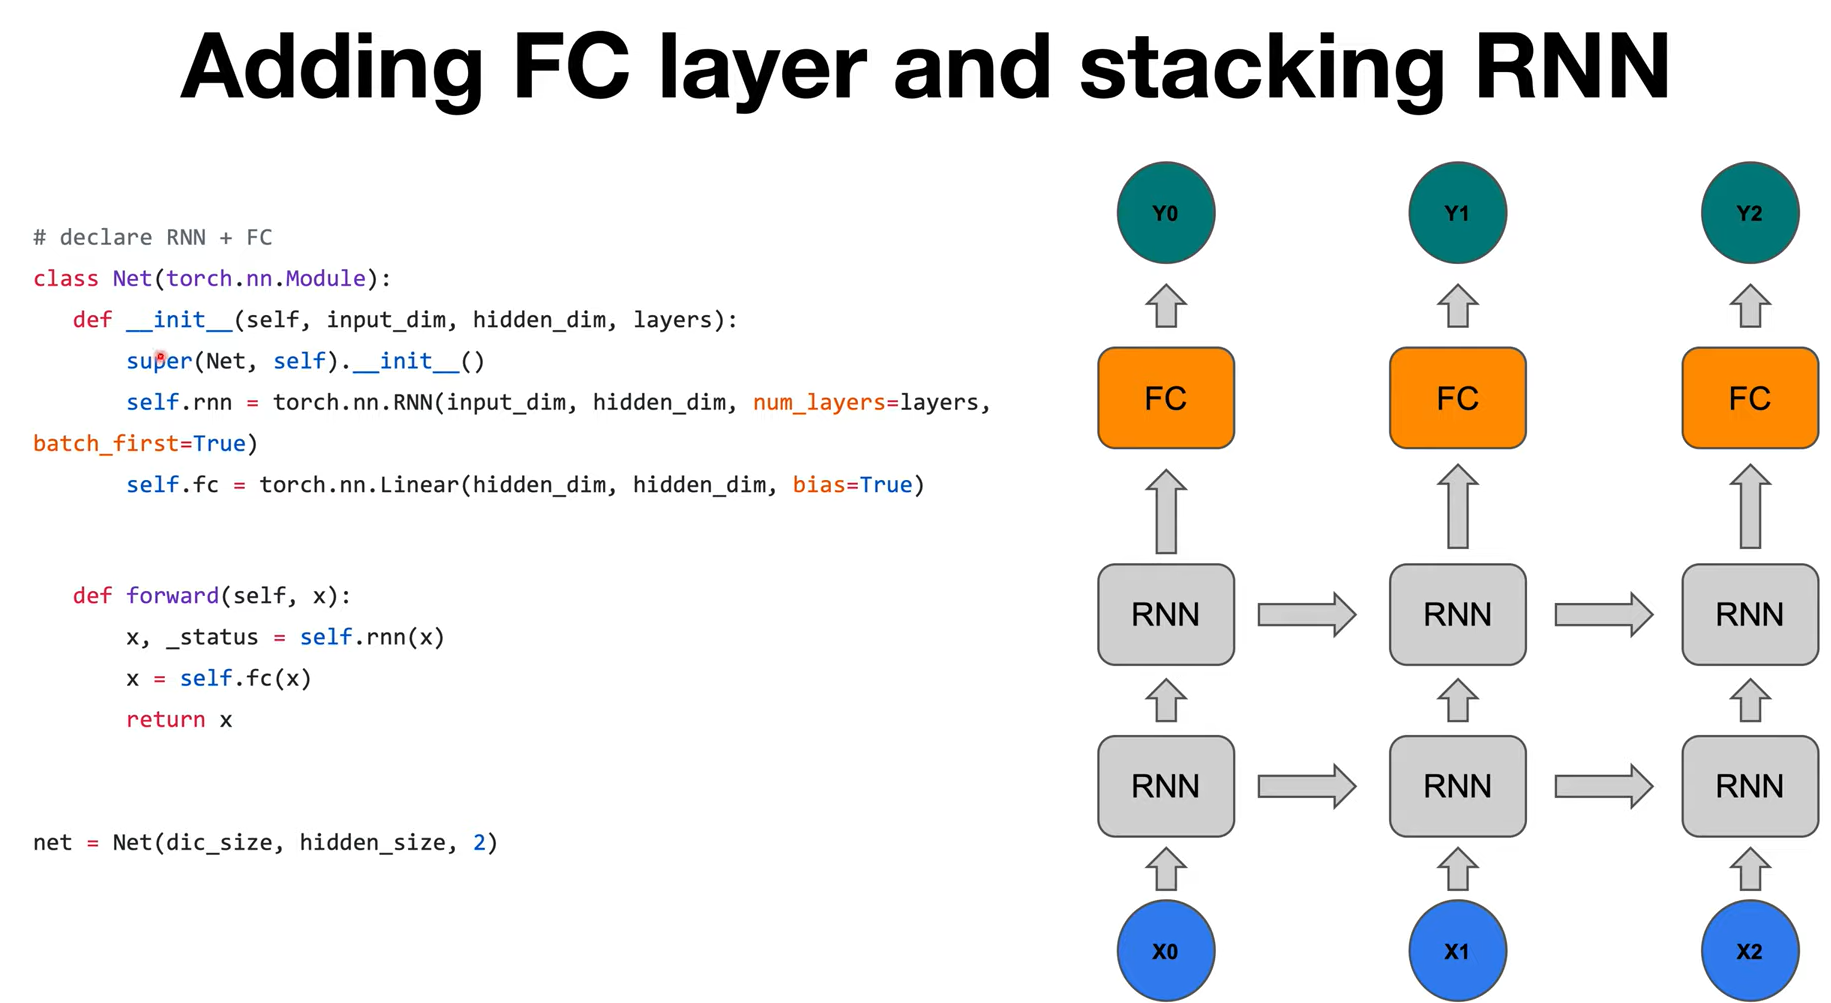

In [25]:
# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [26]:
# declare RNN + FC
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [27]:
# declare RNN + FC
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x


net = Net(dic_size, hidden_size, 2)

In [28]:
# loss & optimizer setting
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [29]:
# start training
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        # print(i, j, ''.join([char_set[t] for t in result]), loss.item())
        if j == 0:
            predict_str += ''.join([char_set[t] for t in result])
        else:
            predict_str += char_set[result[-1]]

    print(predict_str)

soosodddbosdsobodudssdoodusodoodsdssodssdllsoosdsssoosdssodsobobddsosssoodddosdsodsdsoooddsddbdssdoooddodssdoososoddsobosdodssoobdsbdssdodoodddoodddldosssdsoodossdssodsdooddldosdo
ooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
tttttttotoeetette ttttettteotttottetteteteotetetetttttetottttttetotttetoeeetoetotottttteteteettttoettetotetototttttteot tttttettetotttttettetetttetoettttettetttetttetttetttttoettt
 igonlbn lod n'lndtopc  loh od l opt lo l '  l'nigoel  lt d n'o lo l' doelo  nd nco dt llo loiloo  o  lo l'o lo  lo lo loo d ah  loelo  eh  lo l  loelo lon  lolilooicnlln coelo lo
                                                                                                                                                                                   
dn   p os opooopop opoooooo ooooooosooooo opoooooopo ooo opooooooooooop oo o opoooooo opooo oooopooo

t.d   tott totttoto t t  t o ott t t t tod t toe tottt   tt tt  t t tt    t   tott   o e  too tttotot t t t tt   o  t toe tt tto t t tt  to t t ttto  t t t t toe' a t toettot t e 
t.d   toet toet.  ot  toet  to t e t t  o tt  t  to tt ee    t          tot   toet e   et to    tot t t t t et  to  to h   t     t ettt     t toetto et   e t ttnt t t tt   otet   
t.doe toes  oeto ttt  toet  toettett t  o tt  t  to  t ee    to         tt  ttthett    et tto   toeet t t ttnt  to  tt e   t     t e tt   o t toett  et  te t tt.      et ttneet e 
toto  toes  o ttott t t ett t ette   t to tt     t   t eett   o ttee tt  t  t  h  o  t    tte etto          nt  tt et t eett e   t eetth to t   ett e th     e to       to t e t et
toto  to  o   to toot th  t to tt      to  t   n th   n   th to  t    o  o     h tt  h   n th  eth   e t      t ttn too e  th   ethe   h ton     tt   t      e tn       to to  th t
doto  to 'h o bo to toth tt to tth   s to do     th       th to     nto do n o h tt  h  tn bh   th  